# Classification Problem

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# you can choose one of the following package for image reading/processing
import cv2
import PIL

## 1.1 Implement the least squares for classification.

In [2]:
np.set_printoptions(threshold=np.inf)
test_img = cv2.imread("C:/NYCU/ML/hw2/MNIST/0/0.jpg", cv2.IMREAD_GRAYSCALE)
m,n = test_img.shape

img = np.zeros((10,128,m,n))
for i in range(10):
    for j in range(128):
        img[i,j] = cv2.imread("C:/NYCU/ML/hw2/MNIST/"+str(i)+"/"+str(j)+".jpg", cv2.IMREAD_GRAYSCALE)

#Normalization
img = img/255.0

def ran_data(image): #選取32個做為test data
    total = np.arange(128)
    test_data = np.zeros((10,32,m,n))
    train_data = np.zeros((10,128-32,m,n))
    random_num = np.random.choice(127,32,replace = False)
    random_num.sort()
    k=0
    for i in range(128):
        if i in random_num:
            test_data[:,k,:,:] = image[:,i,:,:]
            k+=1
        else:
            train_data[:,i-k,:,:] = image[:,i,:,:]
    return test_data,train_data

data_test_x,data_train_x = ran_data(img)   

np.set_printoptions(threshold=np.inf)
#1 of K
test_t = np.zeros((32*10,10))
train_t = np.zeros((96*10,10))
for i in range(320):
    test_t[i,int(i/32)] = 1 
for i in range(960):
    train_t[i,int(i/96)] = 1 

np.set_printoptions(threshold=np.inf)
def change_shape(data):
    l1,l2,l3,l4 = data.shape
    temp = np.ones((l1*l2,l3*l4))
    temp_1 = np.ones((l1*l2,1)) 
    for i in range(l1):
        for j in range(l2):
            for k in range(l3):
                for w in range(l4):
                    temp[l2*i+j,l3*k+w] = data[i,j,k,w]
    return np.hstack((temp_1,temp))

train_x = change_shape(data_train_x)
test_x = change_shape(data_test_x)

def least_square(data_x,data_t):
    return np.dot(np.dot(np.linalg.pinv(np.dot(data_x.T,data_x)),data_x.T),data_t)

weight = least_square(train_x,train_t)
predict_train = np.dot(train_x,weight)
predict_test = np.dot(test_x,weight)

def accuracy(predict,real):
    count = 0
    for i in range(len(predict)):
        index = np.where(predict[i,:] == np.max(predict[i,:]))
        #print(index)
        if real[i,index] == 1:
            count += 1
    return (count/len(predict))*100

def softmax(data): #softmax activation,將機率控在0-1之間
    return np.exp(data)/np.sum(np.exp(data),axis = 1, keepdims=True)

def loss(predict,real): #計算loss
    tmp = 0
    for i in range(len(predict)):
        for j in range(len(predict[0])):
            tmp += real[i,j]*np.log(predict[i,j])
    return -tmp

print("training accuracy:",accuracy(predict_train,train_t),"%")
print("test accuracy:",accuracy(predict_test,test_t),"%\n")
print("training loss:",loss(softmax(predict_train),train_t))    
print("test loss:",loss(softmax(predict_test),test_t)) 

training accuracy: 100.0 %
test accuracy: 48.4375 %

training loss: 1453.9839077043418
test loss: 724.5214618060966


## 1.2 Implement the logistic regression model

## (a) Plot the learning curves of the loss function and the classification accuracy versus the number of epochs

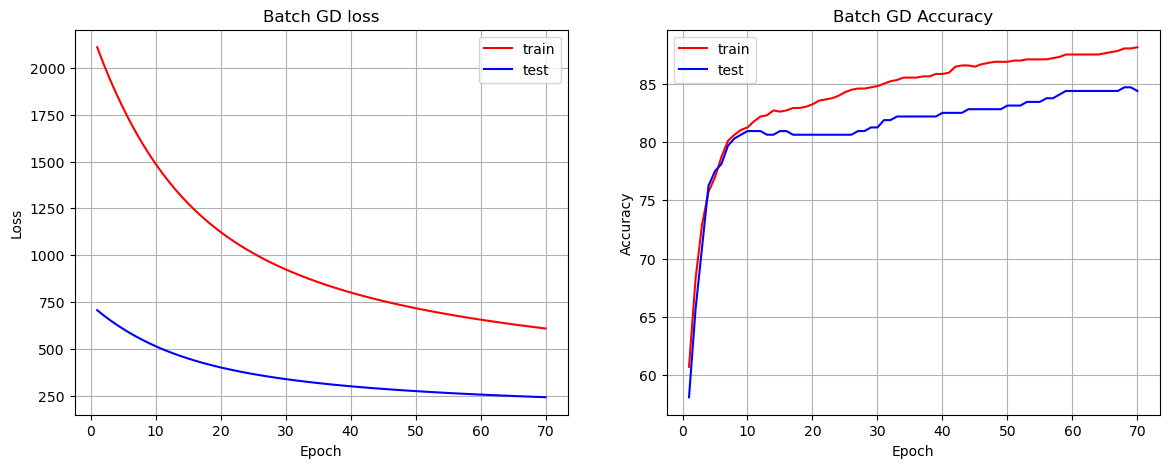

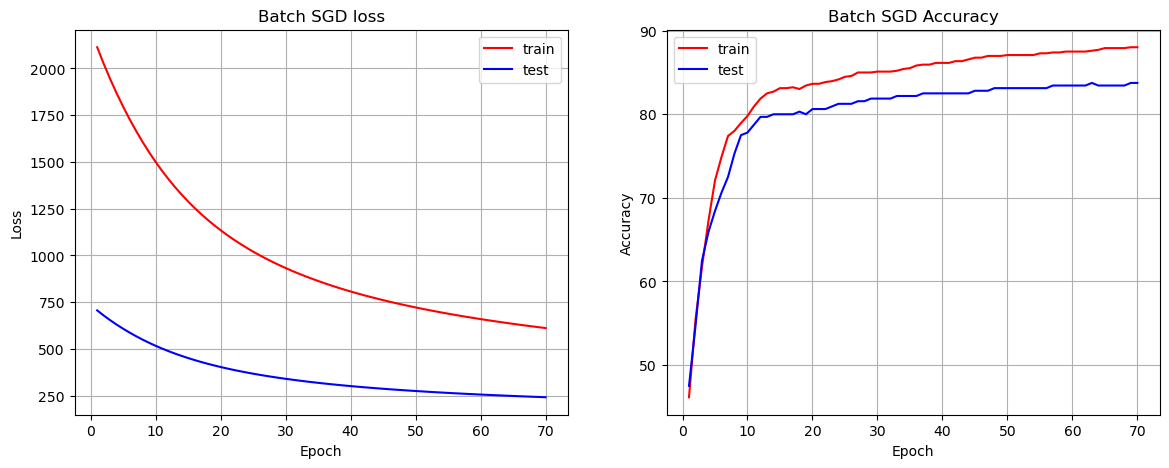

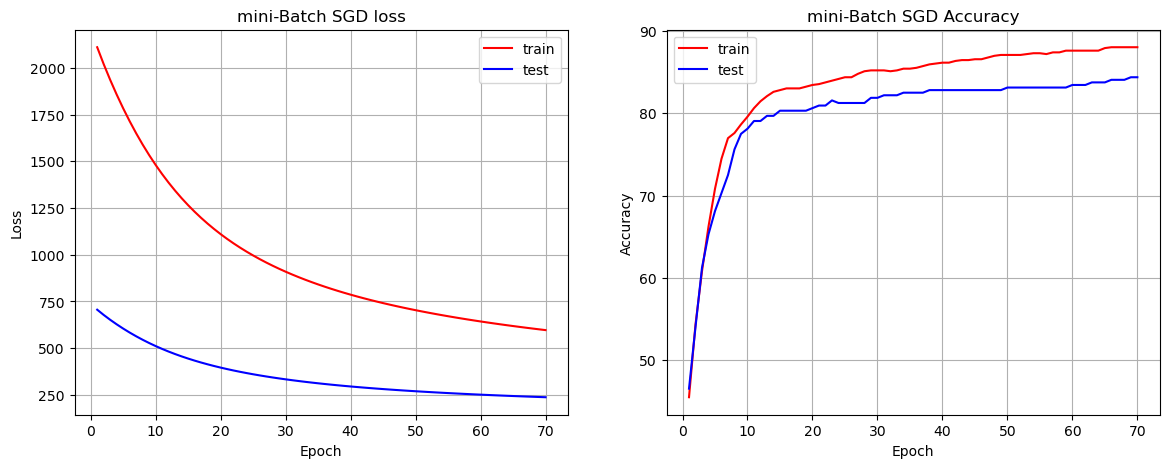

In [3]:
#batch GD (batch gradient descent)
N = 960 #number of training data
B_GD = 960 #Batch size
iter_GD = 1 # Iterations in one epoch
lr = 0.0001 # learning rate
epoch = 70

def logistic_reg(num, size, iteration, l_r, epochs, data_train_x, data_train_t, data_test_x, data_test_t):
    w = np.zeros((10,m*n+1))
    train_err =[]
    train_acc = []
    test_err =[]
    test_acc = []
    #combine = np.hstack((data_train_x,data_train_t))
    for i in range(epochs):
        #np.random.shuffle(combine)
        for j in range(iteration):
            train_tmp_x = data_train_x[j*size:(j+1)*size,:]
            train_tmp_t = data_train_t[j*size:(j+1)*size,:] 
            pre = softmax(np.dot(train_tmp_x,w.T))
            w = w - l_r*np.dot((pre - train_tmp_t).T,train_tmp_x)
        pre_train = softmax(np.dot(data_train_x,w.T))
        pre_test = softmax(np.dot(data_test_x,w.T))
        train_acc.append(accuracy(pre_train,data_train_t))
        train_err.append(loss(pre_train,data_train_t))
        test_acc.append(accuracy(pre_test,data_test_t))
        test_err.append(loss(pre_test,data_test_t))
    return train_err,train_acc,test_err,test_acc

err_train_GD,acc_train_GD,err_test_GD,acc_test_GD = logistic_reg(N, B_GD, iter_GD, lr, epoch, train_x, train_t, test_x, test_t) 

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title("Batch GD loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,epoch+1), err_train_GD, color = "red", label = "train")
plt.plot(range(1,epoch+1), err_test_GD, color = "blue", label = "test")
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("Batch GD Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,epoch+1), acc_train_GD, color = "red", label = "train")
plt.plot(range(1,epoch+1), acc_test_GD, color = "blue", label = "test")
plt.legend()
plt.grid()
plt.show()

#SGD(stochastic gradient descent)
B_SGD = 1 #Batch size
iter_SGD = 960 # Iterations in one epoch
lr = 0.0001 # learning rate
epoch = 70

err_train_SGD,acc_train_SGD,err_test_SGD,acc_test_SGD = logistic_reg(N, B_SGD, iter_SGD, lr, epoch, train_x, train_t, test_x, test_t)

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title("Batch SGD loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,epoch+1), err_train_SGD, color = "red", label = "train")
plt.plot(range(1,epoch+1), err_test_SGD, color = "blue", label = "test")
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("Batch SGD Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,epoch+1), acc_train_SGD, color = "red", label = "train")
plt.plot(range(1,epoch+1), acc_test_SGD, color = "blue", label = "test")
plt.legend()
plt.grid()
plt.show()

#mini-batch SGD
B_miniSGD = 96 #Batch size
iter_miniSGD = 10 # Iterations in one epoch
lr = 0.0001 # learning rate
epoch =70

err_train_miniSGD,acc_train_miniSGD,err_test_miniSGD,acc_test_miniSGD = logistic_reg(N, B_miniSGD, iter_miniSGD, lr, epoch, train_x, train_t, test_x, test_t)

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title("mini-Batch SGD loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,epoch+1), err_train_miniSGD, color = "red", label = "train")
plt.plot(range(1,epoch+1), err_test_miniSGD, color = "blue", label = "test")
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("mini-Batch SGD Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,epoch+1), acc_train_miniSGD, color = "red", label = "train")
plt.plot(range(1,epoch+1), acc_test_miniSGD, color = "blue", label = "test")
plt.legend()
plt.grid()
plt.show()

## (b) Show the final classification accuracy and loss value of training and test data.

In [4]:
print("Final Classification Result: ")
print("Batch GD: ")
print("Training Loss: ",err_train_GD[epoch-1])
print("Test Loss: ",err_test_GD[epoch-1])
print("Training Accuarcy: ",acc_train_GD[epoch-1])
print("Test Accuracy: ",acc_test_GD[epoch-1],"\n")

print("SGD: ")
print("Training Loss: ",err_train_SGD[epoch-1])
print("Test Loss: ",err_test_SGD[epoch-1])
print("Training Accuarcy: ",acc_train_SGD[epoch-1])
print("Test Accuracy: ",acc_test_SGD[epoch-1],"\n")

print("Mini-batch GD: ")
print("Training Loss: ",err_train_miniSGD[epoch-1])
print("Test Loss: ",err_test_miniSGD[epoch-1])
print("Training Accuarcy: ",acc_train_miniSGD[epoch-1])
print("Test Accuracy: ",acc_test_miniSGD[epoch-1],"\n")

Final Classification Result: 
Batch GD: 
Training Loss:  608.3261713544665
Test Loss:  241.15179161311588
Training Accuarcy:  88.125
Test Accuracy:  84.375 

SGD: 
Training Loss:  612.1113680161328
Test Loss:  242.27595713750944
Training Accuarcy:  88.02083333333334
Test Accuracy:  83.75 

Mini-batch GD: 
Training Loss:  596.5716365599367
Test Loss:  237.24419615843885
Training Accuarcy:  88.02083333333334
Test Accuracy:  84.375 



## (c) Based on your observation about the different algorithms (batch GD, SGD and mini-batch SGD), please make some discussion.

從三種方式所得出的loss結果中可以看出loss最小的是mini-natch SGD，原因可能為batch size選的量適中，每次用96組data去進行training而產生了最好的loss;而loss第二大的為SGD所得的結果，batch size為1使得data是逐筆進行training的;最後loss最大的則是GD，原因為每次train的data數量為960，稍微有點太多。從結果來看，雖然將資料在一個epoch中一次全部放進去train的GD計算時間較短，但卻會因為weight進行iteration的次數不夠而產生較大的loss，但逐一訓練效果也未必最好，因此選擇適量的training數量可以得到最小的loss。

## 1.3 Make some discussion about the difference between the results of 1.1 and 1.2.

對於較小的data，least square solution是首選，但是對於非常大的數據集，或者X.T*X的inverse可能不存在的data（矩陣不可逆），對於較大的data GD 或 SGD 方法會來的更好,使用梯度下降，權重在每個iteration後更新，來找出最小loss的權重。在GD中，我們根據完整的training data計算梯度，但在非常大的data的情況下，使用GD可能會非常複雜，因為我們一個epoch只對training data進行一次iteration，因此training data越大，我們更新權重的速度越慢，並且直到它收斂到loss最小值。

從1.1的結果可以看出least squares for classification和真正的least square regression不同並不能找到真正的最小值，因此loss均比1.2中的三種方法都來的大。而透過Gradient Descent可以透過增加epoch的大小來使loss收斂至最小值，並使準確率趨近於100%，效果比least squares for classification來的好。

# Gaussian Process for Regression

## 1. Please construct a kernel function using the basis functions in the following polynomial model and implement the Gaussian process for regression.

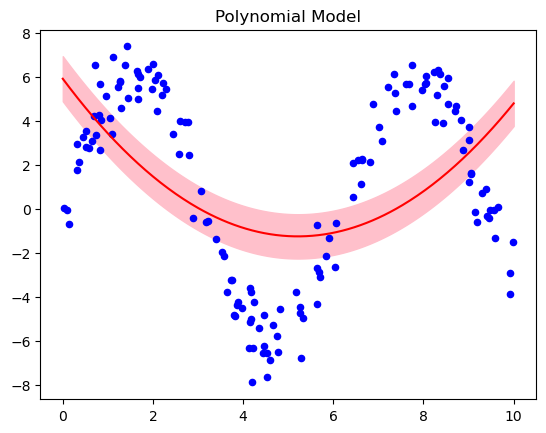

Polynomial Model:
Training RMS error:  3.7147812068375234
Test RMS error:      4.026106202414093


In [5]:
data_x_p = pd.read_csv("x.csv")
data_t_p = pd.read_csv("t.csv")

data_x = np.array(data_x_p) #將data_x_df存為numpy array
data_t = np.array(data_t_p) #將data_t_df存為numpy array

total_num = len(data_x)
t_num = 150 #取前150做為training data
v_num = total_num - t_num #剩餘做validation data

data_trainx = data_x[0:t_num,:]
data_traint = data_t[0:t_num,:]
data_val_x = data_x[t_num:,:]
data_val_t = data_t[t_num:,:]

beta = 1

def least_square(datax,datat): #用來求w的最小平方解
    weight = np.ones((len(datax),1)) 
    phi = np.concatenate((weight,datax,np.square(datax)),axis = 1)
    return np.dot(np.dot(np.linalg.pinv(np.dot(phi.T,phi)),phi.T),datat),phi

w_poly,phi_train = least_square(data_trainx,data_traint)   
y_train_poly = np.dot(phi_train,w_poly)
w_poly_tmp,phi_test = least_square(data_val_x,data_val_t) 
y_test_poly = np.dot(phi_test,w_poly)

def poly_cov(y):
    tmp = 0
    mean = 0
    for i in range(len(y)):
        tmp += np.square(y[i] - mean)
    return tmp/len(y)

poly_covariance = poly_cov(y_train_poly)

def poly_kernel(xn, xm, cov):
    return (1 + xn*xm + (xn**2)*(xm**2))*cov

def Covariance_matrix_poly(num, beta, cov, train):
    matrix = np.zeros((num,num))
    for i in range(num):
        for j in range(num):
            if(i == j):
                matrix[i,j] = poly_kernel(train[i], train[j], cov) + beta**(-1) 
            else:
                matrix[i,j] = poly_kernel(train[i], train[j], cov)
    return np.linalg.inv(matrix)

def poly_RMS(value, num): #計算RMS Error
    return np.sqrt(value/num)

def K_poly(num, train, x, cov):
    tmp = np.zeros((num,1))
    for i in range(num):
        tmp[i,:] = poly_kernel(train[i,:], x, cov)
    return tmp

def c_poly(x, beta, cov):
    return poly_kernel(x, x, cov) + beta**(-1)

def poly_parameter(x, num, beta, cov, train_x, train_t):
    C_inv = Covariance_matrix_poly(num, beta, cov, train_x)
    K = K_poly(num, train_x, x, cov)
    c = c_poly(x, beta, cov)
    mean = np.dot(K.T,np.dot(C_inv,train_t))
    standard = np.sqrt(c - np.dot(K.T,np.dot(C_inv,K)))
    return mean,standard

poly_RMS_train = 0
poly_RMS_train_tmp = 0
poly_RMS_test = 0
poly_RMS_test_tmp = 0

for i in range(t_num):
    mean_train_p,std_train_p = poly_parameter(data_trainx[i], t_num, beta, poly_covariance, data_trainx, data_traint)
    poly_RMS_train_tmp += (mean_train_p - data_traint[i])**2
    mean_test_p,std_test_p = poly_parameter(data_val_x[i], t_num, beta, poly_covariance, data_trainx, data_traint) 
    poly_RMS_test_tmp += (mean_test_p - data_val_t[i])**2
poly_RMS_train = poly_RMS(poly_RMS_train_tmp, t_num)
poly_RMS_test = poly_RMS(poly_RMS_test_tmp, v_num)

predict_p = []
std_poly = []
list_x = np.arange(0,10+1/30,1/30)
for i in list_x:
    mean_p,std_p = poly_parameter(i, t_num, beta, poly_covariance, data_trainx, data_traint)
    predict_p.append(mean_p)
    std_poly.append(std_p)
predict_p = np.array(predict_p)
std_poly = np.array(std_poly)
std_poly_1 = predict_p - std_poly
std_poly_2 = predict_p + std_poly

predict_p_new = []
std_poly_1_new = []
std_poly_2_new = []
for i in range(301):
    tmp1=0
    tmp2=0
    tmp3=0
    tmp1=float(predict_p[i])
    tmp2=float(std_poly_1[i])
    tmp3=float(std_poly_2[i])
    predict_p_new.append(tmp1)
    std_poly_1_new.append(tmp2)
    std_poly_2_new.append(tmp3)

plt.plot(list_x, predict_p_new, color = "red")    
plt.fill_between(list_x, std_poly_1_new, std_poly_2_new, color = "pink")
plt.scatter(data_trainx, data_traint, s = 20, facecolors= "blue")
plt.title("Polynomial Model")
plt.show()
print("Polynomial Model:")
print("Training RMS error: " ,poly_RMS_train[0,0])
print("Test RMS error:     " ,poly_RMS_test[0,0])    

## 2. Repeat 1 by using the widely used exponential-quadratic kernel function 

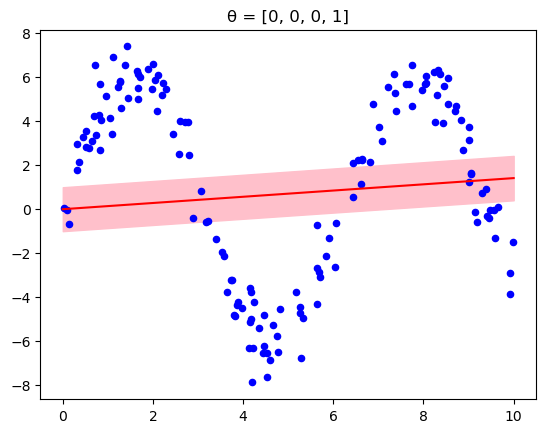

θ = [0, 0, 0, 1]:
Training RMS error:  4.335579611858753
Test RMS error:      4.378509014389944


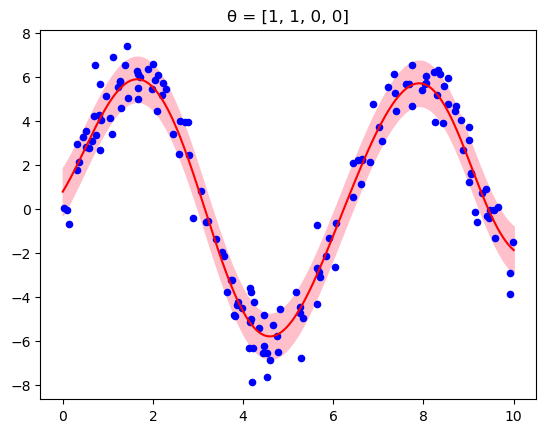

θ = [1, 1, 0, 0]:
Training RMS error:  0.9563642676105917
Test RMS error:      0.9600463323661678


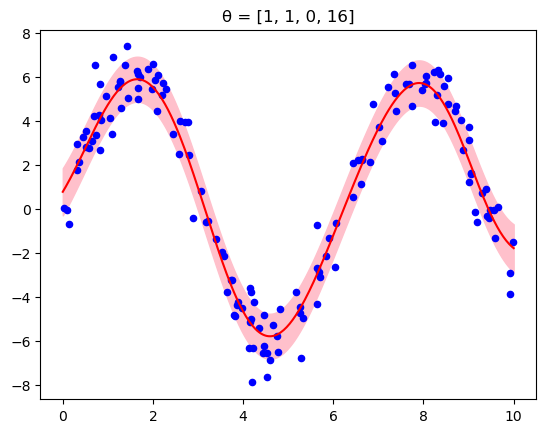

θ = [1, 1, 0, 16]:
Training RMS error:  0.9572824402559393
Test RMS error:      0.9624735743600682


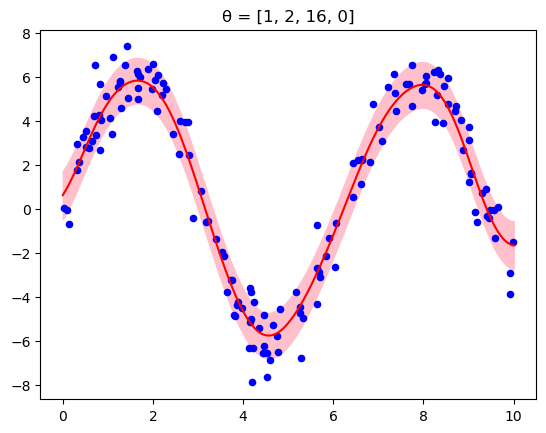

θ = [1, 2, 16, 0]:
Training RMS error:  0.9504982228584715
Test RMS error:      0.9707675411306577


In [6]:
def exponential_quadratic_kernel(x_n, x_m, t):
    return t[0]*np.exp(-0.5*t[1]*((x_n - x_m)**2)) + t[2] + t[3]*x_n*x_m

def Covariance_matrix(num, beta, theta, train):
    matrix = np.zeros((num,num))
    for i in range(num):
        for j in range(num):
            if(i == j):
                matrix[i,j] = exponential_quadratic_kernel(train[i], train[j], theta) + beta**(-1) 
            else:
                matrix[i,j] = exponential_quadratic_kernel(train[i], train[j], theta)
    return np.linalg.inv(matrix)

def RMS(value, num): #計算RMS Error
    return np.sqrt(value/num)

def K_func(num, train, x, t):
    tmp = np.zeros((num,1))
    for i in range(num):
        tmp[i,:] = exponential_quadratic_kernel(train[i,:], x, t)
    return tmp

def covariance(x, beta, t):
    return exponential_quadratic_kernel(x, x, t) + beta**(-1)

def Gaussian_parameter(x, num, beta, theta, train_x, train_t):
    C_inv = Covariance_matrix(num, beta, theta, train_x)
    K = K_func(num, train_x, x, theta)
    c = covariance(x, beta, theta)
    mean = np.dot(K.T,np.dot(C_inv,train_t))
    standard = np.sqrt(c - np.dot(K.T,np.dot(C_inv,K)))
    return mean,standard

#linear kernel θ = {0,0,0,1}
linear_kernel = [0,0,0,1]
lin_RMS_train = 0
lin_RMS_train_tmp = 0
lin_RMS_test = 0
lin_RMS_test_tmp = 0

for i in range(t_num):
    mean_train_l,std_train_l = Gaussian_parameter(data_trainx[i], t_num, beta, linear_kernel, data_trainx, data_traint)
    lin_RMS_train_tmp += (mean_train_l - data_traint[i])**2
    mean_test_l,std_test_l = Gaussian_parameter(data_val_x[i], t_num, beta, linear_kernel, data_trainx, data_traint) 
    lin_RMS_test_tmp += (mean_test_l - data_val_t[i])**2
lin_RMS_train = RMS(lin_RMS_train_tmp, t_num)
lin_RMS_test = RMS(lin_RMS_test_tmp, v_num)

predict_l = []
std_lin = []
list_x = np.arange(0,10+1/30,1/30)
for i in list_x:
    mean_l,std_l = Gaussian_parameter(i, t_num, beta, linear_kernel, data_trainx, data_traint)
    predict_l.append(mean_l)
    std_lin.append(std_l)
predict_l = np.array(predict_l)
std_lin = np.array(std_lin)
std_lin_1 = predict_l - std_lin
std_lin_2 = predict_l + std_lin

predict_l_new = []
std_lin_1_new = []
std_lin_2_new = []
for i in range(301):
    tmp1=0
    tmp2=0
    tmp3=0
    tmp1=float(predict_l[i])
    tmp2=float(std_lin_1[i])
    tmp3=float(std_lin_2[i])
    predict_l_new.append(tmp1)
    std_lin_1_new.append(tmp2)
    std_lin_2_new.append(tmp3)

plt.plot(list_x, predict_l_new, color = "red")    
plt.fill_between(list_x, std_lin_1_new, std_lin_2_new, color = "pink")
plt.scatter(data_trainx, data_traint, s = 20, facecolors= "blue")
plt.title("θ = [0, 0, 0, 1]")
plt.show()
print("θ = [0, 0, 0, 1]:")
print("Training RMS error: " ,lin_RMS_train[0,0])
print("Test RMS error:     " ,lin_RMS_test[0,0])  

#squared exponential kernel θ = {1,1,0,0}
squared_kernel = [1,1,0,0]
sqr_RMS_train = 0
sqr_RMS_train_tmp = 0
sqr_RMS_test = 0
sqr_RMS_test_tmp = 0

for i in range(t_num):
    mean_train_s,std_train_s = Gaussian_parameter(data_trainx[i], t_num, beta, squared_kernel, data_trainx, data_traint)
    sqr_RMS_train_tmp += (mean_train_s - data_traint[i])**2
    mean_test_s,std_test_s = Gaussian_parameter(data_val_x[i], t_num, beta, squared_kernel, data_trainx, data_traint) 
    sqr_RMS_test_tmp += (mean_test_s - data_val_t[i])**2
sqr_RMS_train = RMS(sqr_RMS_train_tmp, t_num)
sqr_RMS_test = RMS(sqr_RMS_test_tmp, v_num)

predict_s = []
std_s = []

for i in list_x:
    mean_s,std_sqrt = Gaussian_parameter(i, t_num, beta, squared_kernel, data_trainx, data_traint)
    predict_s.append(mean_s)
    std_s.append(std_sqrt)
predict_s = np.array(predict_s)
std_s = np.array(std_s)
std_s_1 = predict_s - std_s
std_s_2 = predict_s + std_s

predict_s_new = []
std_s_1_new = []
std_s_2_new = []
for i in range(301):
    tmp1=0
    tmp2=0
    tmp3=0
    tmp1=float(predict_s[i])
    tmp2=float(std_s_1[i])
    tmp3=float(std_s_2[i])
    predict_s_new.append(tmp1)
    std_s_1_new.append(tmp2)
    std_s_2_new.append(tmp3)

plt.plot(list_x, predict_s_new, color = "red")    
plt.fill_between(list_x, std_s_1_new, std_s_2_new, color = "pink")
plt.scatter(data_trainx, data_traint, s = 20, facecolors= "blue")
plt.title("θ = [1, 1, 0, 0]")
plt.show()
print("θ = [1, 1, 0, 0]:")
print("Training RMS error: " ,sqr_RMS_train[0,0])
print("Test RMS error:     " ,sqr_RMS_test[0,0])  

#exponential-quadratic kernel θ = {1,1,0,16}
exponential_kernel = [1,1,0,16]
exp_RMS_train = 0
exp_RMS_train_tmp = 0
exp_RMS_test = 0
exp_RMS_test_tmp = 0

for i in range(t_num):
    mean_train_e,std_train_e = Gaussian_parameter(data_trainx[i], t_num, beta, exponential_kernel, data_trainx, data_traint)
    exp_RMS_train_tmp += (mean_train_e - data_traint[i])**2
    mean_test_e,std_test_e = Gaussian_parameter(data_val_x[i], t_num, beta, exponential_kernel, data_trainx, data_traint) 
    exp_RMS_test_tmp += (mean_test_e - data_val_t[i])**2
exp_RMS_train = RMS(exp_RMS_train_tmp, t_num)
exp_RMS_test = RMS(exp_RMS_test_tmp, v_num)

predict_e = []
std_e = []

for i in list_x:
    mean_e,std_exp = Gaussian_parameter(i, t_num, beta, exponential_kernel, data_trainx, data_traint)
    predict_e.append(mean_e)
    std_e.append(std_exp)
predict_e = np.array(predict_e)
std_e = np.array(std_e)
std_e_1 = predict_e - std_e
std_e_2 = predict_e + std_e

predict_e_new = []
std_e_1_new = []
std_e_2_new = []
for i in range(301):
    tmp1=0
    tmp2=0
    tmp3=0
    tmp1=float(predict_e[i])
    tmp2=float(std_e_1[i])
    tmp3=float(std_e_2[i])
    predict_e_new.append(tmp1)
    std_e_1_new.append(tmp2)
    std_e_2_new.append(tmp3)

plt.plot(list_x, predict_e_new, color = "red")    
plt.fill_between(list_x, std_e_1_new, std_e_2_new, color = "pink")
plt.scatter(data_trainx, data_traint, s = 20, facecolors= "blue")
plt.title("θ = [1, 1, 0, 16]")
plt.show()
print("θ = [1, 1, 0, 16]:")
print("Training RMS error: " ,exp_RMS_train[0,0])
print("Test RMS error:     " ,exp_RMS_test[0,0])  

#exponential-quadratic kernel θ = {1,2,16,0}
exponential1_kernel = [1,2,16,0]
exp1_RMS_train = 0
exp1_RMS_train_tmp = 0
exp1_RMS_test = 0
exp1_RMS_test_tmp = 0

for i in range(t_num):
    mean_train_e1,std_train_e1 = Gaussian_parameter(data_trainx[i], t_num, beta, exponential1_kernel, data_trainx, data_traint)
    exp1_RMS_train_tmp += (mean_train_e1 - data_traint[i])**2
    mean_test_e1,std_test_e1 = Gaussian_parameter(data_val_x[i], t_num, beta, exponential1_kernel, data_trainx, data_traint) 
    exp1_RMS_test_tmp += (mean_test_e1 - data_val_t[i])**2
exp1_RMS_train = RMS(exp1_RMS_train_tmp, t_num)
exp1_RMS_test = RMS(exp1_RMS_test_tmp, v_num)

predict_e1 = []
std_e1 = []

for i in list_x:
    mean_e1,std_exp1 = Gaussian_parameter(i, t_num, beta, exponential1_kernel, data_trainx, data_traint)
    predict_e1.append(mean_e1)
    std_e1.append(std_exp1)
predict_e1 = np.array(predict_e1)
std_e1 = np.array(std_e1)
std_e1_1 = predict_e1 - std_e1
std_e1_2 = predict_e1 + std_e1

predict_e1_new = []
std_e1_1_new = []
std_e1_2_new = []
for i in range(301):
    tmp1=0
    tmp2=0
    tmp3=0
    tmp1=float(predict_e1[i])
    tmp2=float(std_e1_1[i])
    tmp3=float(std_e1_2[i])
    predict_e1_new.append(tmp1)
    std_e1_1_new.append(tmp2)
    std_e1_2_new.append(tmp3)

plt.plot(list_x, predict_e1_new, color = "red")    
plt.fill_between(list_x, std_e1_1_new, std_e1_2_new, color = "pink")
plt.scatter(data_trainx, data_traint, s = 20, facecolors= "blue")
plt.title("θ = [1, 2, 16, 0]")
plt.show()
print("θ = [1, 2, 16, 0]:")
print("Training RMS error: " ,exp1_RMS_train[0,0])
print("Test RMS error:     " ,exp1_RMS_test[0,0])  

## 3. Try to tune the hyperparameter in 2 to find the best combination for the dataset. Use automatic relevance determination (ARD) in Chapter 6.4.4 of textbook. 

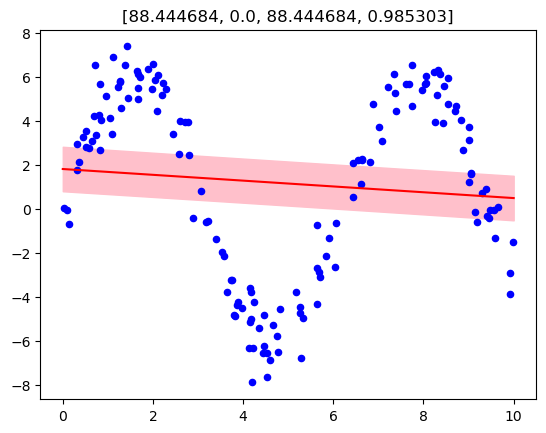

Initial θ =  [0, 0, 0, 1]
Initail Training RMS error:  4.335579611858753
Initial Test RMS error:      4.378509014389944 

ARD θ = [ 88.444684 , 0.0 , 88.444684 , 0.985303 ]
ARD Training RMS error:  4.225836864083538
ARD Test RMS error:      4.358836760692803 



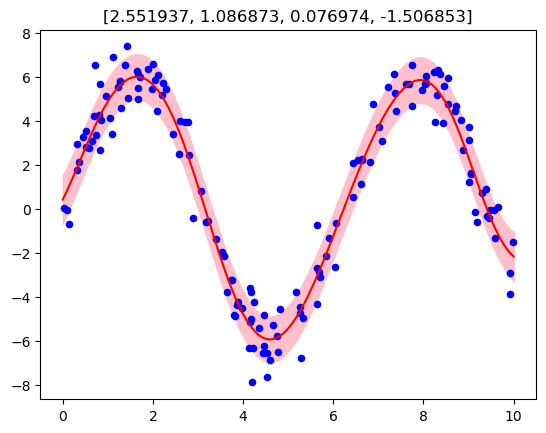

Initial θ =  [1, 1, 0, 0]
Initail Training RMS error:  0.9563642676105917
Initial Test RMS error:      0.9600463323661678 

ARD θ = [ 2.551937 , 1.086873 , 0.076974 , -1.506853 ]
ARD Training RMS error:  0.9298762102125387
ARD Test RMS error:      0.926366937790785 



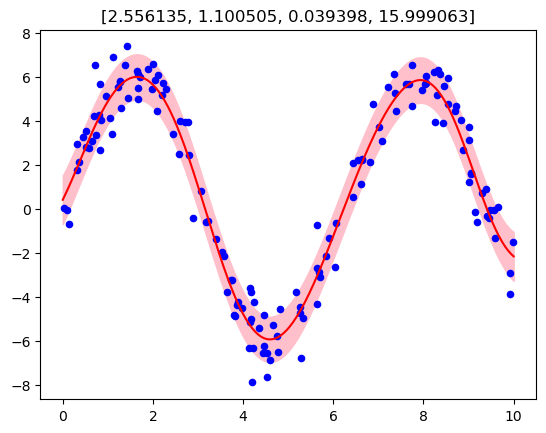

Initial θ =  [1, 1, 0, 16]
Initail Training RMS error:  0.9572824402559393
Initial Test RMS error:      0.9624735743600682 

ARD θ = [ 2.556135 , 1.100505 , 0.039398 , 15.999063 ]
ARD Training RMS error:  0.9296584454274892
ARD Test RMS error:      0.9263175143521538 



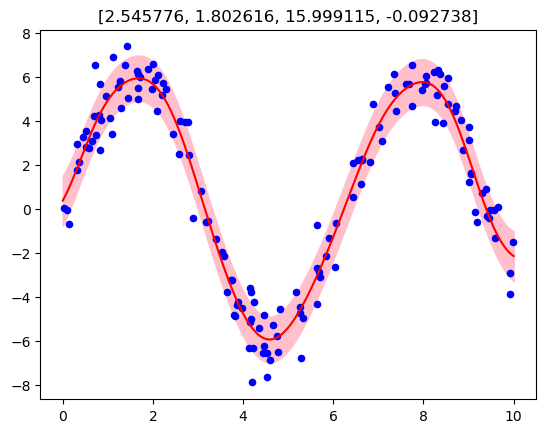

Initial θ =  [1, 2, 16, 0]
Initail Training RMS error:  0.9504982228584715
Initial Test RMS error:      0.9707675411306577 

ARD θ = [ 2.545776 , 1.802616 , 15.999115 , -0.092738 ]
ARD Training RMS error:  0.9250020940236955
ARD Test RMS error:      0.9303374612499208 



In [7]:
theta_list = [[0,  0,  0, 1], [1, 1,  0, 0], [1, 1,  0, 16], [1, 2, 16, 0]]
ARD_lr = 0.0001
ARD_iter = 300
initial_train_RMS = [lin_RMS_train[0,0], sqr_RMS_train[0,0], exp_RMS_train[0,0], exp1_RMS_train[0,0]]
initial_test_RMS = [lin_RMS_test[0,0], sqr_RMS_test[0,0], exp_RMS_test[0,0], exp1_RMS_test[0,0]]

def likelihood(c_inv, dt, train_t):
    return -0.5*(np.trace(np.dot(c_inv, dt))) + 0.5*np.dot(train_t.T,np.dot(c_inv.T,np.dot(dt,np.dot(c_inv.T, train_t))))

def differential(theta, num, train):
    d0 = np.zeros((num, num))
    d1 = np.zeros((num, num))
    d2 = np.zeros((num, num))
    d3 = np.zeros((num, num))
    for i in range(num):
        for j in range(num):
            d0[i,j] = np.exp(-0.5*t[1]*((train[i] - train[j])**2))
            d1[i,j] = t[0]*np.exp(-0.5*t[1]*((train[i] - train[j])**2))*(-0.5*((train[i] - train[j])**2))
            d2[i,j] = 1
            d3[i,j] = train[i]*train[j]
    return d0,d1,d2,d3

def iter_theta(iteration, t, lr, num, train_x, train_t, c_inv):
    t0 = t[0]
    t1 = t[1]
    t2 = t[2]
    t3 = t[3]
    t_list = []
    dt0,dt1,dt2,dt3 = differential(t, num, train_x)
    for i in range(iteration):
        t0 += lr*likelihood(c_inv, dt0, train_t)
        t1 += lr*likelihood(c_inv, dt1, train_t)
        t2 += lr*likelihood(c_inv, dt2, train_t)
        t3 += lr*likelihood(c_inv, dt3, train_t)
    t_list = [t0, t1, t2, t3]
    return t_list
count = 0

for t in theta_list:
    cinv = Covariance_matrix(t_num, beta, t, data_trainx)
    new_t = iter_theta(ARD_iter, t, ARD_lr, t_num, data_trainx, data_traint, cinv)
    
    new_RMS_train = 0
    new_RMS_train_tmp = 0
    new_RMS_test = 0
    new_RMS_test_tmp = 0
    
    t_new = []
    for i in range(4):
        tmp = 0
        tmp = float(new_t[i])
        tmp = round(tmp,6)
        t_new.append(tmp)
        
    for i in range(t_num):
        mean_train,std_train = Gaussian_parameter(data_trainx[i], t_num, beta, t_new, data_trainx, data_traint)
        new_RMS_train_tmp += (mean_train - data_traint[i])**2
        mean_test,std_test = Gaussian_parameter(data_val_x[i], t_num, beta, t_new, data_trainx, data_traint) 
        new_RMS_test_tmp += (mean_test - data_val_t[i])**2
    new_RMS_train = RMS(new_RMS_train_tmp, t_num)
    new_RMS_test = RMS(new_RMS_test_tmp, v_num)

    predict = []
    std = []

    for i in list_x:
        mean,stand = Gaussian_parameter(i, t_num, beta, t_new, data_trainx, data_traint)
        predict.append(mean)
        std.append(stand)
    predict = np.array(predict)
    std = np.array(std)
    std_1 = predict - std
    std_2 = predict + std

    predict_new = []
    std_1_new = []
    std_2_new = []
    for i in range(301):
        tmp1=0
        tmp2=0
        tmp3=0
        tmp1=float(predict[i])
        tmp2=float(std_1[i])
        tmp3=float(std_2[i])
        predict_new.append(tmp1)
        std_1_new.append(tmp2)
        std_2_new.append(tmp3)
       
    plt.plot(list_x, predict_new, color = "red")    
    plt.fill_between(list_x, std_1_new, std_2_new, color = "pink")
    plt.scatter(data_trainx, data_traint, s = 20, facecolors= "blue")
    plt.title(t_new)
    plt.show()
    print("Initial θ = ", t)
    print("Initail Training RMS error: " ,initial_train_RMS[count])
    print("Initial Test RMS error:     " ,initial_test_RMS[count], "\n")
    print("ARD θ = [", t_new[0],",",t_new[1],",",t_new[2],",",t_new[3],"]")
    print("ARD Training RMS error: " ,new_RMS_train[0,0])
    print("ARD Test RMS error:     " ,new_RMS_test[0,0], "\n")
    count += 1

## 4. Explain your findings and do some discussion. 

1.在第一題中可以看出polynomial model所做出來的圖形為二次曲線和我們的數據吻合度較差，因此導致training和test的RMS error也較大。

2.從第二題中所提供的四種hyperparameters θ = {θ0, θ1, θ2, θ3}中，透過比較結果以及我另外做了幾種不同的組合得到的結果可以得出θ2和θ3對結果的吻合度影響並不大，原因應該為這兩者只影響了1和xn.⊤*xm項導致複雜度不夠高來吻合data，在有值或是等於0的情況中不怎麼改變作圖的結果和RMS error;相對的θ0和θ1對作圖是否吻合data的分布影響巨大，若是有其中一個的值為0均會導致做出來得圖如同 θ = {0, 0, 0, 1}的圖,原因應該為這兩者影響的項複雜度較高，和data的吻合度至關重要。

3.在做完ARD後雖然沒有優化很大的幅度，但還是能看出四組的RMS error均有下降的趨勢，另外若是learnining rate調太大反而會造成RMS error的上升，也和Iteration的次數有關。